In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.optimize import curve_fit

In [2]:
def power_law(r, psi):
    return r**psi

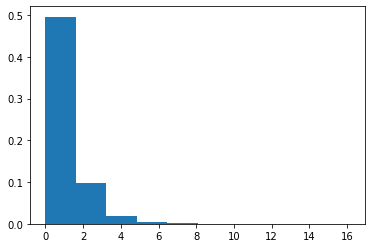

In [3]:
"""
Store a sparse matrix which contains all the couplings for bond and field strengths 
Decimate bonds according to Ma-Dasgupta while keeping track of the energy scale, number of decimated bonds, etc.
Discard couplings below some scale, since the they are unaffected by the decimation (potentially dynamically scale it)
"""

#First pass

N = 10000000
J_vals = np.exp(-np.random.exponential(size=N))            #PM couplings
#zeta_ij_vals = np.random.exponential(size=N)     #FM couplings

plt.hist(-np.log(J_vals), density=True)
plt.show()


In [4]:
dOmega = 0.005
Omega_0 = J_vals.max()
steps = 90

Gamma_array = []
dec_spins = []

J_new = J_vals

for step in range(steps):
    
    Omega = J_new.max()
    Gamma_array.append(np.log(Omega_0/Omega))
    J_mask = J_new > (Omega - dOmega)
    #print("Decimated Spins = "+str(2*J_mask.sum()))
    J_temp = J_new
    
    if step == 0: dec_spins.append(2*J_mask.sum())
    else: dec_spins.append(2*J_mask.sum()+dec_spins[-1])
    J_site = J_new[J_mask]
    J_pre = np.roll(J_new, -1)[J_mask]
    J_post = np.roll(J_new, 1)[J_mask]

    J_MD = J_pre * J_post/(2*Omega)

    J_mask_dec = np.any([J_mask, np.roll(J_mask, 1), np.roll(J_mask, -1)], axis=0)
    J_mask_remain = np.logical_not(J_mask_dec)

    J_temp[J_mask_dec] = 0
    J_temp[J_mask] = J_MD
    J_new = J_temp[J_temp!=0]

#plt.hist(beta_new)
#plt.show()

(array([2.51495025e-01, 5.49167694e-02, 1.19556672e-02, 2.59180727e-03,
        5.60986342e-04, 1.19390612e-04, 2.83326435e-05, 5.74523049e-06,
        1.10182503e-06, 3.93508938e-07]),
 array([ 0.59786175,  3.70658739,  6.81531302,  9.92403866, 13.03276429,
        16.14148993, 19.25021556, 22.3589412 , 25.46766684, 28.57639247,
        31.68511811]),
 <BarContainer object of 10 artists>)

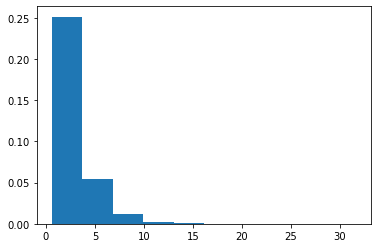

In [5]:
plt.hist(-np.log(J_new), density=True)

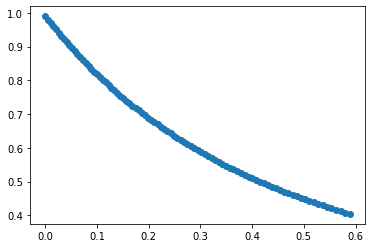

In [8]:
plt.scatter(Gamma_array, (N-np.array(dec_spins))/N)


#plt.plot(Gamma_array, (np.array(Gamma_array)+1)**(-2))

In [7]:
x_data = (np.array(Gamma_array)+1)
y_data = (N-np.array(dec_spins))/N

popt, pcov = curve_fit(power_law, x_data, y_data)

popt

array([-2.01145714])

In [130]:
psi = -1/popt[0]
print(psi)

0.4968555318138056
